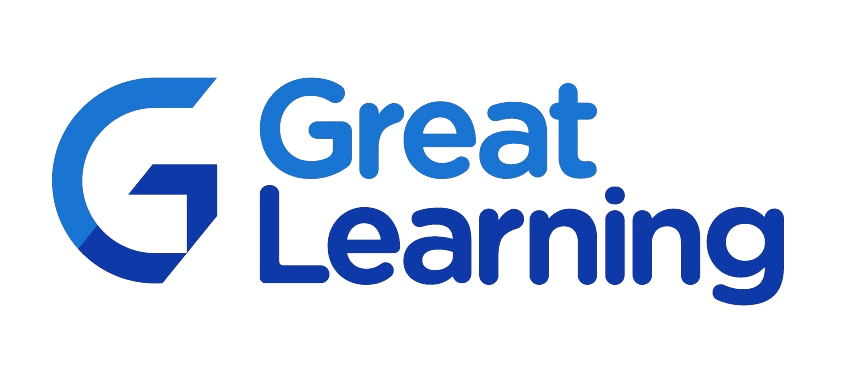


## **GitHub repository URL**
## **https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git**


# **Voicebot with Neural Intent Identification**

------------------------------------------------------------------------------------

## **Problem Statement and Objective**
-----------------------------------------------------------------------------------------
In this project, we are going to build our own Conversational AI Framework where we will target only the Natural Language Understanding aspect of these conversations. We will be aiming to identify intents from the user's message and give a suitable reply based on that message in a one-to-one mapping. Each intent will have a pre-defined set of responses, which will be sent as outputs of the bot. The objective is to build a Neural Network model that identifies intents with high accuracies.

You can assume that this framework is being built for a Pizza Ordering FAQ Chatbot present on the business website of a Pizza restaurant. The questions and answers catered to by this bot will be in the nature of such a business.



## **0. Dataset and Intents (25 marks)**


The dataset file is named 'intents_pizza.json'. However, this is not a dataset of conversations, but rather a file that contains intents, patterns and responses. Although the file has been pre-filled with a few intents and questions that would be typical of such a chatbot, you are required to further populate the json file with further intents and questions that you would like to include in your chatbot.

## **New intent and questions added to the JSON file:**



## **1. Importing the Necessary Libraries**

In [1]:
from abc import ABCMeta, abstractmethod

import random
import json
import pickle
import numpy as np
import os

# Setting the environment variable to suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Importing NLTK library and WordNet lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer

# Importing the TensorFlow library for machine learning.
import tensorflow as tf
# Importing the Keras module from TensorFlow.
from tensorflow import keras
# Importing the Input layer from Keras.
from tensorflow.keras.layers import Input
# Importing the Model class from Keras.
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Layers that are used to implement the ANN and LSTM model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import SGD, Adam

# Importing function to load a saved Keras model
from tensorflow.keras.models import load_model

# Downloading necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)


True

In [2]:
# Connect to google drive from Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Initializing the Lemmatizer**

In [3]:
# instantiate a lemmatizer and download the data file which is in JSON format
lemmatizer = WordNetLemmatizer()
intents = json.loads(open('/content/drive/My Drive/Artificial Neural Networks/DataSets/intents_pizza.json').read())

In [4]:
# check for values in the intent JSON file
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi',
    "Hi, what's up?",
    'How are you',
    'Is anyone there?',
    'Hello',
    'Good day',
    'Whats up',
    'Hey',
    'greetings',
    'Namaste',
    'Hola'],
   'responses': ['Hello!',
    'Good to see you again!',
    'Hi there, how can I help?'],
   'context_set': ''},
  {'tag': 'goodbye',
   'patterns': ['cya',
    'See you later',
    'Goodbye',
    'I am Leaving',
    'Have a Good day',
    'bye',
    'caio',
    'see ya',
    'Adios'],
   'responses': ['Sad to see you go :(',
    'Talk to you later',
    'Goodbye!',
    'Bye! Come back again soon.'],
   'context_set': ''},
  {'tag': 'Additional_cost',
   'patterns': ['How much additional cost is there for online order?',
    'Is there an additional charge for ordering online?',
    'Do we have to pay extra for online orders?',
    'Any additional charges for online orders'],
   'responses': ["There's an additional 10% charge for online orders",
    '10 percent extra s

The second line of code loads a JSON file called intents_pizza.json and parses its contents into a Python object using the json module.

The intents_pizza.json file contains a collection of intents and their associated responses, which will be used to build the chatbot.

## **3. Creating the Training Data from the Intents Dataset**

In [5]:
# define 3 empty lists
words = []
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.',] # The ignore letters is a list of characters that won't be tokenized. You can populate this further with characters you want to ignore.

In [6]:
# run the data through a nested for loop to tokenize tho create the vocabulary
for intent in intents['intents']:             # Iterate over each intent in the intents object
    for pattern in intent['patterns']:        # Iterate over each pattern (i.e., example sentence) associated with the current intent

       word_list = nltk.word_tokenize(pattern)
       words.extend(word_list)                # The array words acts as the Vocabulary
       documents.append((word_list, intent['tag'])) # The array documents contain the training data in the ['text', 'intent'] format
       if intent['tag'] not in classes:
          classes.append(intent['tag'])      # The array classes contain all the output classes.

print(documents)

# length of the array documents
len(documents)

[(['Hi'], 'greeting'), (['Hi', ',', 'what', "'s", 'up', '?'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey'], 'greeting'), (['greetings'], 'greeting'), (['Namaste'], 'greeting'), (['Hola'], 'greeting'), (['cya'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['I', 'am', 'Leaving'], 'goodbye'), (['Have', 'a', 'Good', 'day'], 'goodbye'), (['bye'], 'goodbye'), (['caio'], 'goodbye'), (['see', 'ya'], 'goodbye'), (['Adios'], 'goodbye'), (['How', 'much', 'additional', 'cost', 'is', 'there', 'for', 'online', 'order', '?'], 'Additional_cost'), (['Is', 'there', 'an', 'additional', 'charge', 'for', 'ordering', 'online', '?'], 'Additional_cost'), (['Do', 'we', 'have', 'to', 'pay', 'extra', 'for', 'online', 'orders', '?'], 'Additional_cost'), (['Any', 'additional', 'charges', 'for', 'online', 'orders'], 'Additional_cost'), ([

53

In [7]:
# print the vocabulary
print(words)

# size of the vocabulary
print(len(words))

['Hi', 'Hi', ',', 'what', "'s", 'up', '?', 'How', 'are', 'you', 'Is', 'anyone', 'there', '?', 'Hello', 'Good', 'day', 'Whats', 'up', 'Hey', 'greetings', 'Namaste', 'Hola', 'cya', 'See', 'you', 'later', 'Goodbye', 'I', 'am', 'Leaving', 'Have', 'a', 'Good', 'day', 'bye', 'caio', 'see', 'ya', 'Adios', 'How', 'much', 'additional', 'cost', 'is', 'there', 'for', 'online', 'order', '?', 'Is', 'there', 'an', 'additional', 'charge', 'for', 'ordering', 'online', '?', 'Do', 'we', 'have', 'to', 'pay', 'extra', 'for', 'online', 'orders', '?', 'Any', 'additional', 'charges', 'for', 'online', 'orders', 'Can', 'I', 'get', 'a', 'refund', 'on', 'cancellation', '?', 'What', 'is', 'the', 'refund', 'policy', 'for', 'online', 'orders', '?', 'Is', 'there', 'any', 'way', 'to', 'get', 'Refunded', 'while', 'cancelling', 'my', 'order', '?', 'What', "'s", 'the', 'status', 'of', 'my', 'order', '?', 'Can', 'I', 'know', 'the', 'status', 'of', 'my', 'order', '?', 'Thanks', 'Thank', 'you', 'That', "'s", 'helpful', 'Aw

In [8]:
# lemmatize the words in the vocabulary
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))

In [9]:
# print corpus after lemmatization
print(words)

# size of lematized vocabulary
len(words)

["'s", 'a', 'additional', 'adios', 'am', 'an', 'any', 'anyone', 'are', 'awesome', 'best', 'bye', 'caio', 'call', 'calorie', 'can', 'cancellation', 'cancelling', 'card', 'charge', 'contact', 'cost', 'coupon', 'cya', 'day', 'delivery', 'discount', 'do', 'doe', 'extra', 'food', 'for', 'get', 'gift', 'good', 'goodbye', 'great', 'greeting', 'have', 'healthy', 'hello', 'helpful', 'helping', 'hey', 'hi', 'hola', 'how', 'i', 'is', 'know', 'later', 'le', 'leaving', 'located', 'many', 'me', 'much', 'my', 'namaste', 'near', 'nearest', 'new', 'no', 'nope', 'nutritious', 'of', 'offer', 'on', 'online', 'order', 'ordering', 'pay', 'payment', 'pizza', 'place', 'policy', 'refund', 'refunded', 'see', 'status', 'store', 'student', 'thank', 'thanks', 'that', 'the', 'there', 'to', 'up', 'use', 'way', 'we', 'what', 'whats', 'where', 'while', 'ya', 'you', 'your']


99

In [10]:
classes = sorted(list(set(classes)))

# print the array classes that contain all the output classes
print(classes)

# number of classes in the dataset
print(len(classes))

['Additional_cost', 'Refund', 'Status', 'appreciate', 'goodbye', 'greeting', 'location', 'no', 'nutrition', 'options', 'ordering', 'thanks']
12


In [11]:
training = [] # create an empty list training
output_empty = [0] * len(classes)

for document in documents:
   bag = [] # create an empty list bag
   word_patterns = document[0]
   word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
   for word in words: # lemmatized vocabulary
     bag.append(1) if word in word_patterns else bag.append(0)

   output_row = list(output_empty)
   output_row[classes.index(document[1])] = 1
   training.append([bag, output_row])

In [12]:
# print the shape of the training data
print(training)
print(len(training))

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0,

In [13]:
# divide the training data into dependent and independent variables
random.shuffle(training)
training = np.array(training, dtype=object)
train_x = list(training[:, 0])
train_y = list(training[:, 1])

In [14]:
# print the training dataset
print(train_x)

# print the size of the training dataset
print(len(train_x))

# print the input sequence
print(len(train_x[0]))

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# print the labels for the training dataset
print(train_y)

# print the number of classes for the text classification.
len(train_y[0])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0

12

## **4. Model Building**

In this part of the project, you will need to build the model to take in the user text as input and classify it as one of the existing intents present in the intents_pizza.json file. Since this is a classification task, the output layer should have as many neurons as **len(train_y[0])**.

You may choose any type of neural layers or any composite units while building the model. You can also choose to use a pre-trained model which you need to fine-tune based on the current classification data present in the intents_pizza.json.

### **4.1 Build and compile a simple model with fewer parameters and check the training accuracy (10 marks)**

In [16]:
# Define the neural network architecture

# initialize the constructor
model = Sequential()
# hidden layer 1
model.add(Dense(128, input_shape = (None,len(train_x[0]))))
# hidden layer 2
model.add(Dense(64, activation='relu'))
# dropout layer
model.add(Dropout(0.5))
# output layer
model.add(Dense(len(train_y[0]), activation='softmax'))

# print the summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 128)         12800     
                                                                 
 dense_1 (Dense)             (None, None, 64)          8256      
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 dense_2 (Dense)             (None, None, 12)          780       
                                                                 
Total params: 21836 (85.30 KB)
Trainable params: 21836 (85.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# Define the optimizer and compile the model

# optimizer function
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True) # with 0.01 learning rate
#compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### **4.2 Train your model (15 marks)**

In [18]:
# stop training if the validation loss has reached minimum
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
mcp_save = ModelCheckpoint('.mdl_wts.h5', save_best_only=True, monitor='loss', mode='min')

# Train the model with the training data
epochs = 150
batch_size = 32

# fit raw training dataset to the ANN model
history = model.fit(train_x,train_y, epochs=epochs,batch_size = batch_size,callbacks=[es,mcp_save], verbose = 1 )


Epoch 1/150
2/2 [==============================] - 1s 26ms/step - loss: 2.4524 - accuracy: 0.1698
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 2.4328 - accuracy: 0.1321
Epoch 3/150
2/2 [==============================] - 0s 5ms/step - loss: 2.4422 - accuracy: 0.1887
Epoch 4/150
2/2 [==============================] - 0s 18ms/step - loss: 2.4265 - accuracy: 0.1321
Epoch 5/150
1/2 [==============>...............] - ETA: 0s - loss: 2.3649 - accuracy: 0.1562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 16ms/step - loss: 2.3550 - accuracy: 0.1698
Epoch 6/150
2/2 [==============================] - 0s 6ms/step - loss: 2.3738 - accuracy: 0.2830
Epoch 7/150
2/2 [==============================] - 0s 16ms/step - loss: 2.3359 - accuracy: 0.1887
Epoch 8/150
2/2 [==============================] - 0s 14ms/step - loss: 2.2740 - accuracy: 0.3019
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 2.1989 - accuracy: 0.3962
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 2.1830 - accuracy: 0.4151
Epoch 11/150
2/2 [==============================] - 0s 14ms/step - loss: 2.1819 - accuracy: 0.3208
Epoch 12/150
2/2 [==============================] - 0s 16ms/step - loss: 2.1636 - accuracy: 0.3585
Epoch 13/150
2/2 [==============================] - 0s 14ms/step - loss: 2.1051 - accuracy: 0.3396
Epoch 14/150
2/2 [==============================] - 0s 15ms/step - loss: 2.0648 - accuracy: 0.3962
Epoch 15/150
2/2 [==========

### **Observations:**

<font color='sky blue'>

1.   The model training stopped after 68 epochs due to early stopping
2.   The accuracy attained was 88%
1.   A case can me made for adding more layers to the ANN to increase the accuracy
2.   More data can be added to the dataset to provide additional data for the model to train.
1.   Since there are resource constraints or limited data availability a pre trained model or a RNN/LSTM model can be used to verify if these models increase the accuracy score.


## **5. Preprocessing of User Text**

The following functions will clean and preprocess the user-provided text, before feeding it into the Text Classification pipeline.

In [19]:
# function 1 - define function to tokenize, lower case and lemmatize user input
def clean_up_sentence(sentence):
  sentence_words = nltk.word_tokenize(sentence)
  sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
  return sentence_words

<font color='sky blue'>
The **clean_up_sentence()** function cleans up a sentence by tokenizing it into a list of words and then lemmatizing and lowercasing each word.

In [20]:
# function 2 - creates bag of words vector for user input
def bag_of_words(sentence, words):
  sentence_words = clean_up_sentence(sentence) # uses the clean_up_sentence function to tokenize and preprocess the user input
  bag = [0] * len(words)
  for s in sentence_words:
    for i, word in enumerate(words): # for each word in the input sentence, check for words in vocabulary
       if word == s:
          bag[i] = 1
  return np.array(bag) # returns bag of words vector for the user input as a numpy array


# function 3 - uses the ANN model created and the user input as test data to predict
def predict_class(sentence):
    p = bag_of_words(sentence, words)
    res = model.predict(np.array([p]))[0] # use the ANN model to predict the intent classes and their probabilities
    ERROR_THRESHOLD = 0.1
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
      return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list # returns test results


**bag_of_words(sentence, words)** - This function takes a sentence and a list of words as input, and returns a Bag-of-Words vector for the sentence. It first uses the *clean_up_sentence()* function to tokenize and clean up the sentence, and then creates a vector of zeros with the same length as the words list. For each word in the cleaned-up sentence, it checks if the word is in the words list, and if so, sets the corresponding element in the bag-of-words vector to 1. The function then returns *the Bag-of-Words vector as a Numpy array*.

**predict_class(sentence)** - This function takes a sentence as input, and returns a list of predicted intents and their probabilities. It first creates a Bag-of-Words vector for the sentence using the *bag_of_words()* function. It then uses the trained Neural Network model (model) to predict the output probabilities for each class. *The ERROR_THRESHOLD variable is used to filter out low-probability classes*, and the remaining classes are sorted in descending order of probability. The function then creates a list of dictionaries, where each dictionary contains the predicted intent and its probability. The list is sorted in descending order of probability, and then returned.

In [21]:
# function 4 - based on the predictions maps to responses in the intent file.
def get_response(intents_list, intents_json):
    try:
        tag = intents_list[0]['intent']            # This line gets the predicted intent tag from the first element of the intents_list
        list_of_intents = intents_json['intents']
        for i in list_of_intents:
            if i['tag']  == tag:
               result = random.choice(i['responses'])
               break
    except IndexError:
        result = "I don't understand!"      # This line assigns a default response to the result variable if no intent was predicted
    return result

This function allows you to retrieve a response for a predicted intent by looking up the corresponding intent in the intents_pizza.json file and randomly choosing a response from the responses list. If no intent was predicted, a default response is returned.

## **6. Testing our Chatbot**

After getting the response from the chatbot, get that response read by a Text-to-Speech (TTS) model of your choice, to create the Voicebot.

Modern Text-to-Speech models use Deep Learning techniques to generate synthetic speech from text. The process involves three main steps: text processing, acoustic modeling, and waveform synthesis. In this notebook, we will be utilizing a function that abstracts out these steps and directly converts our text into machine speech.

## **7. Importing the Necessary Libraries for Text-to-Speech (TTS)**

In [22]:
# Install the gTTS library
!pip install gTTS

# Import the necessary modules
from gtts import gTTS

# Import Audio method from IPython's Display Class
from IPython.display import Audio

import time

## **8. Implementing the TTS (20 marks)**

In [23]:
# print response to user query
message = input("")
ints = predict_class(message)
res = get_response(ints, intents)
print(res)


what's my order status?
1/1 [==============================] - 0s 59ms/step
To check the status of your order, please go to the 'Check Status' tab in your app


In [24]:
# Define the text you want to convert to speech
text = res
# Create a gTTS object and specify the language
tts = gTTS(text=text, lang='en')
# Save the audio file
tts.save('output.wav')
# Save the string converted to speech as a .wav file
Audio('output.wav', autoplay=True)

## **9. Creating a Sequential Deep Learning Model with RNNs/LSTMs/GRUs**

In [25]:
# create an index for the entire vocabulary
word_to_index = {'<PAD>': 0, '<UNK>': 1}
for i, word in enumerate(words):
    word_to_index[word] = i + 2


In [26]:
# print the index of the vocabulary
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, "'s": 2, 'a': 3, 'additional': 4, 'adios': 5, 'am': 6, 'an': 7, 'any': 8, 'anyone': 9, 'are': 10, 'awesome': 11, 'best': 12, 'bye': 13, 'caio': 14, 'call': 15, 'calorie': 16, 'can': 17, 'cancellation': 18, 'cancelling': 19, 'card': 20, 'charge': 21, 'contact': 22, 'cost': 23, 'coupon': 24, 'cya': 25, 'day': 26, 'delivery': 27, 'discount': 28, 'do': 29, 'doe': 30, 'extra': 31, 'food': 32, 'for': 33, 'get': 34, 'gift': 35, 'good': 36, 'goodbye': 37, 'great': 38, 'greeting': 39, 'have': 40, 'healthy': 41, 'hello': 42, 'helpful': 43, 'helping': 44, 'hey': 45, 'hi': 46, 'hola': 47, 'how': 48, 'i': 49, 'is': 50, 'know': 51, 'later': 52, 'le': 53, 'leaving': 54, 'located': 55, 'many': 56, 'me': 57, 'much': 58, 'my': 59, 'namaste': 60, 'near': 61, 'nearest': 62, 'new': 63, 'no': 64, 'nope': 65, 'nutritious': 66, 'of': 67, 'offer': 68, 'on': 69, 'online': 70, 'order': 71, 'ordering': 72, 'pay': 73, 'payment': 74, 'pizza': 75, 'place': 76, 'policy': 77, 'refund': 78, 're

In [27]:
# tokenize the training data
tokenized_sentences = [] # empty list to collect the tokenized sentences
for document in documents:
    tokens = [] # empty list to collect the tokens
    for word in document[0]:
        if word in word_to_index:
            tokens.append(word_to_index[word])
        else:
            tokens.append(word_to_index['<UNK>'])
    tokenized_sentences.append(tokens)
# padding the
max_len = 10
padded_sentences = pad_sequences(tokenized_sentences, maxlen=max_len, padding='post', truncating='post')

In [28]:
train_x_lstm = padded_sentences
# shape of training data
print(train_x_lstm.shape)
# input sequence of training data
print(train_x_lstm[0])

(53, 10)
[1 0 0 0 0 0 0 0 0 0]


In [30]:
# convert the dependent variable into an array type
train_y_lstm = np.array(train_y)
train_y_lstm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [31]:
# input shape for LSTM based architecture
len(word_to_index)

101

In [32]:
# shape of the training data
train_x_lstm.shape[1]

10

### **9.1 Creating the Complex Architecture with Embedding layer, RNN/LSTM/GRU, and compiling your model**
### **(10 marks)**

In [33]:
# Creating model Using LSTM

embedding_vector_features=40

# initializing the constructor
model2= Sequential()
#Embedding layer
model2.add(Embedding(len(word_to_index), embedding_vector_features, input_length=train_x_lstm.shape[1]))
# Dropout layer
model2.add(SpatialDropout1D(0.2))
# LSTM layer
model2.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))
# Dropout layer
model2.add(Dropout(0.2))
# output layer
model2.add(Dense(len(train_y[0]), activation = 'softmax'))


# print the summary of the model
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 40)            4040      
                                                                 
 spatial_dropout1d (Spatial  (None, 10, 40)            0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 150)               114600    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 12)                1812      
                                                                 
Total params: 120452 (470.52 KB)
Trainable params: 120452 (470.52 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [34]:
# compile the model
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### **9.2 Training your model (15 marks)**

In [35]:
# stop training if the validation loss has reached minimum
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
mcp_save = ModelCheckpoint('.mdl_wts.h5', save_best_only=True, monitor='loss', mode='min')

history = model2.fit(train_x_lstm, train_y_lstm, epochs=150,batch_size = 32,callbacks=[es,mcp_save], verbose = 1 )

Epoch 1/150
2/2 [==============================] - 2s 41ms/step - loss: 2.4878 - accuracy: 0.0943
Epoch 2/150
2/2 [==============================] - 0s 32ms/step - loss: 2.4750 - accuracy: 0.2264
Epoch 3/150
2/2 [==============================] - 0s 33ms/step - loss: 2.4683 - accuracy: 0.2075
Epoch 4/150
2/2 [==============================] - 0s 33ms/step - loss: 2.4562 - accuracy: 0.2075
Epoch 5/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 42ms/step - loss: 2.4432 - accuracy: 0.2075
Epoch 6/150
2/2 [==============================] - 0s 42ms/step - loss: 2.4297 - accuracy: 0.2075
Epoch 7/150
2/2 [==============================] - 0s 33ms/step - loss: 2.4036 - accuracy: 0.2075
Epoch 8/150
2/2 [==============================] - 0s 34ms/step - loss: 2.3896 - accuracy: 0.2075
Epoch 9/150
2/2 [==============================] - 0s 33ms/step - loss: 2.3482 - accuracy: 0.2075
Epoch 10/150
2/2 [==============================] - 0s 33ms/step - loss: 2.3443 - accuracy: 0.2075
Epoch 11/150
2/2 [==============================] - 0s 21ms/step - loss: 2.3465 - accuracy: 0.2075
Epoch 12/150
2/2 [==============================] - 0s 36ms/step - loss: 2.3279 - accuracy: 0.2075
Epoch 13/150
2/2 [==============================] - 0s 21ms/step - loss: 2.3551 - accuracy: 0.2075
Epoch 14/150
2/2 [==============================] - 0s 33ms/step - loss: 2.3225 - accuracy: 0.2075
Epoch 15/150
2/2 [=========

## **10. Testing Model2 on our chatbot**

In [36]:
# function-1 for processing user input
def predict_class(sentence):
    tokenized_sentence = [] # empty list of tokenized sentence
    tokens = [] # empty list for capturing word tokens
    for word in sentence.split():
        if word in word_to_index:
            tokens.append(word_to_index[word])
        else:
            tokens.append(word_to_index['<UNK>'])
    tokenized_sentence.append(tokens)
    padded_sentence = pad_sequences(tokenized_sentence, maxlen=10, padding='post', truncating='post') # padding of input sequence to make them uniform with max length 10
    res = model2.predict(padded_sentence)[0]
    ERROR_THRESHOLD = 0.1
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
      return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list

In [37]:
# function-2 check for intents and responses in the intent JSON file
def get_response(intents_list, intents_json):
    try:
        tag = intents_list[0]['intent']
        list_of_intents = intents_json['intents']
        for i in list_of_intents:
            if i['tag']  == tag:
               result = random.choice(i['responses'])
               break
    except IndexError:
        result = "I don't understand!"
    return result

In [38]:
# print response to user query
message = input("")
ints_lstm = predict_class(message)
res_lstm = get_response(ints_lstm, intents)
print(res_lstm)

where's my order?
1/1 [==============================] - 0s 181ms/step
There's an additional 10% charge for online orders


In [39]:
# Define the text you want to convert to speech
text = res_lstm
# Create a gTTS object and specify the language
tts = gTTS(text=text, lang='en')
# Save the audio file
tts.save('output_lstm.wav')
# Save the string converted to speech as a .wav file
Audio('output_lstm.wav', autoplay=True)

## **11. Observations and Conclusions (5 marks)**

Please note down your observations and conclusions from this project, including your reasons for choosing a particular model.

<font color='sky blue'>

1.   The ANN model gives an accuracy of 88% while the LSTM model gives an accuracy of 64%
2.   The LSTM model or a Transformed model doesn't perform well here because of resource contraint of large training data not being available for training the model.
1.   This project proves that using NLP for designing chatbots has a signinficant advantage as an alternate for human interactions in customer service scenarios.  
2.   The text to speech implementation generates human-like speech, which can be used to enable a more interactive and natural communication experience rather than a robotic experience when customers interact with chatbots.
1.   As is evident, with a lower number of training examples, the ANN has performed better than the LSTM model as it fits on the training data better.
2.  ***Conclusion*** - Given the current training data set and the project use case, deploying the ANN model serves our purpose best.  
1.   Better models can be generated by adding more training data examples, more layers in both ANN and LSTM models, or hypertuning the parameters on both models.


# **Additional Section: Real-world Ramifications**

While we have seen a simple example of how Intent Identification would be done in a prototypical chatbot, in actuality Intent Classification is a very active area of research involving large ensemble architectural models. The nuances of Natural Language means extracting intents from prompts with 99%+ accuracy is often quite a difficult proposition.

The **RASA Diet** architecture (used inside the NLU portion of the RASA Conversational AI framework) is one such example of this:


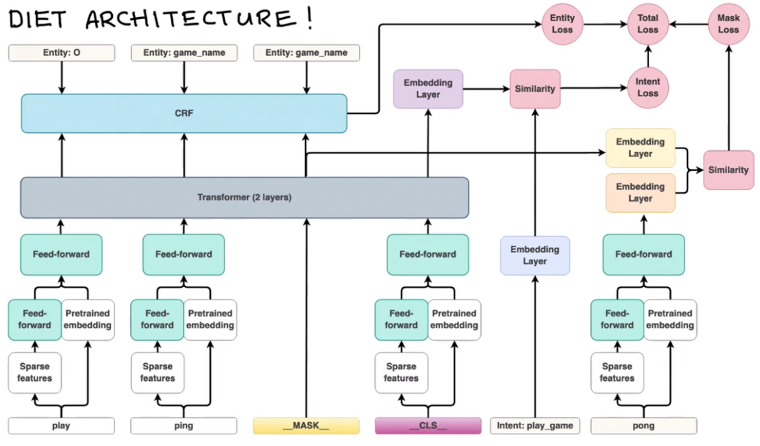

Instead of just relying on Dense Embeddings for sentences, RASA NLU tries to use Sparse / One-hot Encodings of words as part of a larger scheme of deriving the best possible embeddings for Conversational Understanding, in order to derive the intents and entities. It is a LEGO-style architecture, where one can swap out various parts of the model with other equivalent blocks.

As an example, for getting the Pretrained Embeddings, one could easily swap out Word2vec for BERT, and for the Sparse Embeddings, one could easily use TF-IDF in place of Bag-of-Words.

While such models may be too complex for all but industry-grade NLP solutions, it is worth remembering the Law of Diminishing Returns in building AI products - achieving a 10% reduction in error often requires a significant jump in complexity, and that is where the cutting-edge of the industry often functions.